# KNN - Recruitment Data

The dataset contains placement data for students with various attributes that could influence their placement outcomes.

- sl_no: Serial number,  a unique identifier for each student.
- gender: The gender of the individual (e.g., M for Male).
- ssc_p: Secondary Education percentage- 10th Grade.
- ssc_b: Board of Education for Secondary Education.
- hsc_p: Higher Secondary Education percentage- 12th Grade.
- hsc_b: Board of Education for Higher Secondary Education.
- hsc_s: Specialization in Higher Secondary Education.
- degree_p: Degree percentage.
- degree_t: Type of degree.
- workex: Work experience (Yes or No).
- etest_p: E-test percentage.
- specialisation: MBA specialization.
- mba_p: MBA percentage.
- status: Placement status (Placed or Not Placed).
- salary: Salary offered to the placed students.

## Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
placement=pd.read_csv("Placement_Data.csv")

In [3]:
placement.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [4]:
placement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


We have **215 candidate details** and there are mixed datatypes in each column. We have  missing values in the salary column as expected since those are the people who didn't get hired

In [5]:
print('Data columns with null values:',placement.isnull().sum(), sep = '\n')

Data columns with null values:
sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64


**Inference**
* There are **67 null values** in our data, which means 67 unhired candidates. 
* We can't drop these values as this will provide a valuable information on why candidates failed to get hired.
* We can't impute it with mean/median values and it will go against the context of this dataset and it will show unhired candidates got salary.
* Our best way to deal with these null values is to **impute it with '0'** which shows they don't have any income

### Data Cleaning

**Handling missing values**
First lets focus on the missing data in review features,if we drop the rows which has null values we might sabotage some potential information from the dataset. So we have to impute values into the NaN values. Since it is a salary feature,it is best to impute the records with '0' for unhired candidates

In [6]:
placement['salary'].fillna(0, inplace=True)
print('Salary column with null values:',placement['salary'].isnull().sum(), sep = '\n')

Salary column with null values:
0


No more missing values in the salary columns! Now it's time to drop unwanted features !

In [7]:
placement.drop(['sl_no','ssc_b','hsc_b'], axis = 1,inplace=True) 
placement.head()

,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,91.00,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,78.33,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,68.00,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,52.00,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,M,85.80,73.60,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


### EDA

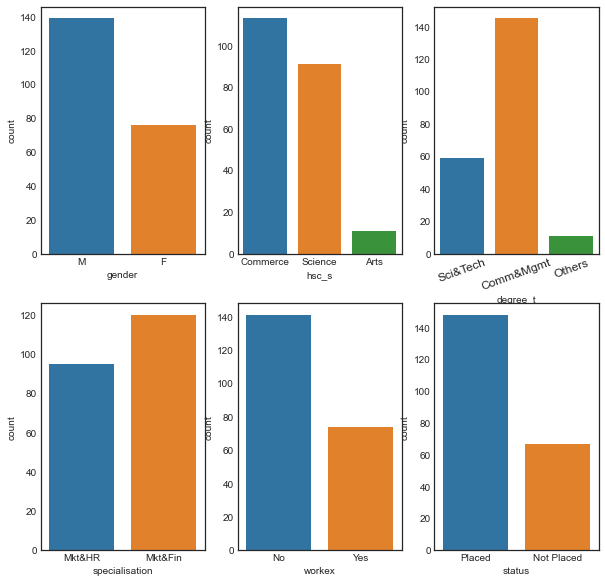

In [8]:
plt.figure(figsize = (15, 7))
plt.style.use('seaborn-white')

#Specialisation
plt.subplot(234)
ax=sns.countplot(x="specialisation", data=placement)

#Work experience
plt.subplot(235)
ax=sns.countplot(x="workex", data=placement)

#Degree type
plt.subplot(233)
ax=sns.countplot(x="degree_t", data=placement)

fig = plt.gcf()
fig.set_size_inches(10,10)
ax.set_xticklabels(ax.get_xticklabels(),fontsize=12,rotation=20)

#Gender
plt.subplot(231)
ax=sns.countplot(x="gender", data=placement)

#Higher secondary specialisation
plt.subplot(232)
ax=sns.countplot(x="hsc_s", data=placement)

#Status of recruitment
plt.subplot(236)
ax=sns.countplot(x="status", data=placement)


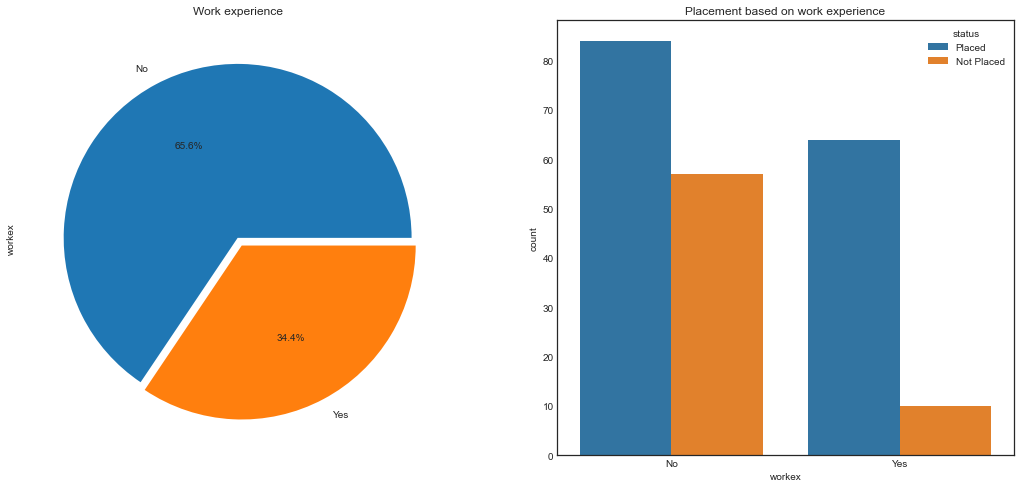

In [9]:
f,ax=plt.subplots(1,2,figsize=(18,8))
plt.style.use('seaborn-white')

#Pie chart
placement['workex'].value_counts().plot.pie(explode=[0,0.05],autopct='%1.1f%%',ax=ax[0])
ax[0].set_title('Work experience')

#Column chart
sns.countplot(x = 'workex',hue = "status",data = placement)
ax[1].set_title('Placement based on work experience')
plt.show()

In [10]:
X = placement.drop(['status', 'salary'],axis=1)
y = placement['status']

In [11]:
X = pd.get_dummies(X, drop_first=True)
X.head()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,gender_M,hsc_s_Commerce,hsc_s_Science,degree_t_Others,degree_t_Sci&Tech,workex_Yes,specialisation_Mkt&HR
0,67.00,91.00,58.00,55.0,58.80,1,1,0,0,1,0,1
1,79.33,78.33,77.48,86.5,66.28,1,0,1,0,1,1,0
2,65.00,68.00,64.00,75.0,57.80,1,0,0,0,0,0,0
3,56.00,52.00,52.00,66.0,59.43,1,0,1,0,1,0,1
4,85.80,73.60,73.30,96.8,55.50,1,1,0,0,0,0,0


## Train and Test Split

In [12]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

### Model1
Let's fit a KNN Classifier

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors':list(range(1,20))}
grid = GridSearchCV(KNeighborsClassifier(), param_grid, verbose=3)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 19 candidates, totalling 95 fits
[CV 1/5] END .....................n_neighbors=1;, score=0.714 total time=   0.0s
[CV 2/5] END .....................n_neighbors=1;, score=0.714 total time=   0.0s
[CV 3/5] END .....................n_neighbors=1;, score=0.824 total time=   0.0s
[CV 4/5] END .....................n_neighbors=1;, score=0.794 total time=   0.0s
[CV 5/5] END .....................n_neighbors=1;, score=0.735 total time=   0.0s
[CV 1/5] END .....................n_neighbors=2;, score=0.657 total time=   0.0s
[CV 2/5] END .....................n_neighbors=2;, score=0.714 total time=   0.0s
[CV 3/5] END .....................n_neighbors=2;, score=0.765 total time=   0.0s
[CV 4/5] END .....................n_neighbors=2;, score=0.794 total time=   0.0s
[CV 5/5] END .....................n_neighbors=2;, score=0.765 total time=   0.0s
[CV 1/5] END .....................n_neighbors=3;, score=0.714 total time=   0.0s
[CV 2/5] END .....................n_neighbors=3;

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19]},
             verbose=3)

In [14]:
grid.best_params_

{'n_neighbors': 9}

In [15]:
grid_predictions = grid.best_estimator_.predict(X_test)

In [16]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, grid_predictions)
print("Confusion Matrix:\n", confusion_matrix)

Confusion Matrix:
 [[ 4  8]
 [ 1 30]]


In [17]:
from sklearn.metrics import classification_report
print("Classification Report:\n",classification_report(y_test, grid_predictions))

Classification Report:
               precision    recall  f1-score   support

  Not Placed       0.80      0.33      0.47        12
      Placed       0.79      0.97      0.87        31

    accuracy                           0.79        43
   macro avg       0.79      0.65      0.67        43
weighted avg       0.79      0.79      0.76        43



### Model2
Let's fit the model in logistic regression and figure out the accuracy of our model

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression(max_iter =500)
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

In [19]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion_matrix)


Confusion Matrix:
 [[ 9  3]
 [ 2 29]]


In [20]:
from sklearn.metrics import classification_report
print("Classification Report:\n",classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

  Not Placed       0.82      0.75      0.78        12
      Placed       0.91      0.94      0.92        31

    accuracy                           0.88        43
   macro avg       0.86      0.84      0.85        43
weighted avg       0.88      0.88      0.88        43



### Model 3
Let's checkout how the model makes the decision using Decision Tree Classifier

In [21]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=3)
dt = dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)

In [22]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion_matrix)

Confusion Matrix:
 [[ 5  7]
 [ 1 30]]


In [23]:
from sklearn.metrics import classification_report
print("Classification Report:\n",classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

  Not Placed       0.83      0.42      0.56        12
      Placed       0.81      0.97      0.88        31

    accuracy                           0.81        43
   macro avg       0.82      0.69      0.72        43
weighted avg       0.82      0.81      0.79        43



In [24]:
dict(zip(X.columns,dt.feature_importances_))

{'ssc_p': 0.5872938719341184,
 'hsc_p': 0.23071616773562276,
 'degree_p': 0.08131015356386873,
 'etest_p': 0.0,
 'mba_p': 0.10067980676639003,
 'gender_M': 0.0,
 'hsc_s_Commerce': 0.0,
 'hsc_s_Science': 0.0,
 'degree_t_Others': 0.0,
 'degree_t_Sci&Tech': 0.0,
 'workex_Yes': 0.0,
 'specialisation_Mkt&HR': 0.0}

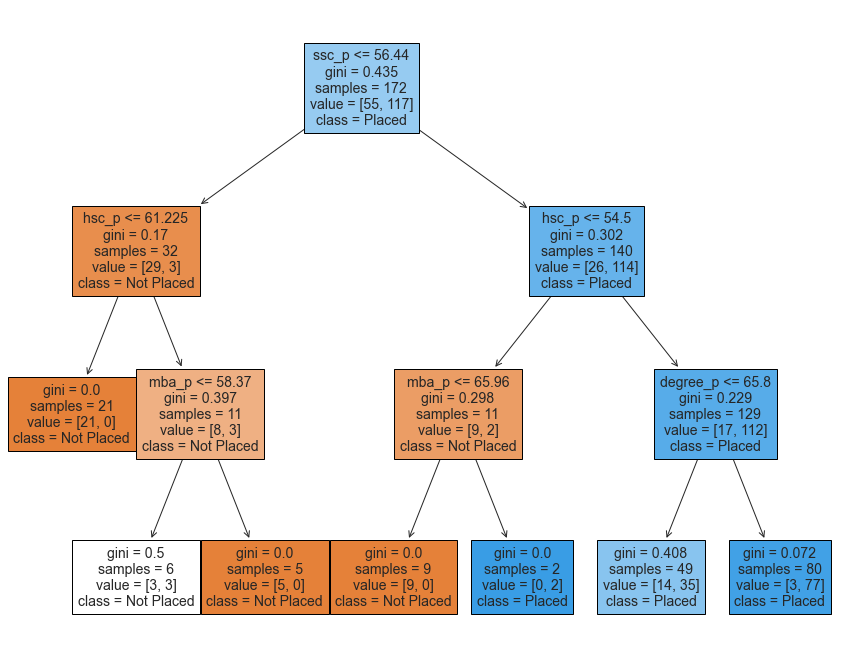

In [25]:
from sklearn import tree
fig = plt.figure(figsize = (15,12))
tree_viz = tree.plot_tree(dt, 
                         feature_names = X_train.columns,
                         class_names = y_train.values,
                         filled=True)

### Model 4
Let's fit a Random Forest

In [26]:
from sklearn.ensemble import RandomForestClassifier
param_grid = {'n_estimators':[50, 100, 200, 500]}
grid = GridSearchCV(RandomForestClassifier(), param_grid, verbose=3)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END ...................n_estimators=50;, score=0.829 total time=   0.1s
[CV 2/5] END ...................n_estimators=50;, score=0.857 total time=   0.1s
[CV 3/5] END ...................n_estimators=50;, score=0.941 total time=   0.1s
[CV 4/5] END ...................n_estimators=50;, score=0.794 total time=   0.1s
[CV 5/5] END ...................n_estimators=50;, score=0.912 total time=   0.1s
[CV 1/5] END ..................n_estimators=100;, score=0.829 total time=   0.1s
[CV 2/5] END ..................n_estimators=100;, score=0.857 total time=   0.1s
[CV 3/5] END ..................n_estimators=100;, score=0.882 total time=   0.1s
[CV 4/5] END ..................n_estimators=100;, score=0.765 total time=   0.1s
[CV 5/5] END ..................n_estimators=100;, score=0.912 total time=   0.1s
[CV 1/5] END ..................n_estimators=200;, score=0.829 total time=   0.2s
[CV 2/5] END ..................n_estimators=200;,

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [50, 100, 200, 500]}, verbose=3)

In [27]:
grid.best_params_

{'n_estimators': 200}

In [28]:
grid_predictions = grid.best_estimator_.predict(X_test)

In [29]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, grid_predictions)
print("Confusion Matrix:\n", confusion_matrix)

Confusion Matrix:
 [[ 6  6]
 [ 1 30]]


In [30]:
from sklearn.metrics import classification_report
print("Classification Report:\n",classification_report(y_test, grid_predictions))

Classification Report:
               precision    recall  f1-score   support

  Not Placed       0.86      0.50      0.63        12
      Placed       0.83      0.97      0.90        31

    accuracy                           0.84        43
   macro avg       0.85      0.73      0.76        43
weighted avg       0.84      0.84      0.82        43



### Model 5
Let's use SVM to classify our data

In [31]:
from sklearn.svm import SVC

param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': ["auto","scale"],'kernel': ['linear','rbf']} 
grid = GridSearchCV(SVC(), param_grid, verbose=3)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END ..C=0.1, gamma=auto, kernel=linear;, score=0.771 total time=   0.0s
[CV 2/5] END ..C=0.1, gamma=auto, kernel=linear;, score=0.886 total time=   0.0s
[CV 3/5] END ..C=0.1, gamma=auto, kernel=linear;, score=0.853 total time=   0.0s
[CV 4/5] END ..C=0.1, gamma=auto, kernel=linear;, score=0.912 total time=   0.0s
[CV 5/5] END ..C=0.1, gamma=auto, kernel=linear;, score=0.853 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=auto, kernel=rbf;, score=0.686 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=auto, kernel=rbf;, score=0.686 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=auto, kernel=rbf;, score=0.676 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=auto, kernel=rbf;, score=0.676 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=auto, kernel=rbf;, score=0.676 total time=   0.0s
[CV 1/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.771 total time=   0.0s
[CV 2/5] END .C=0.1, gamma=scale, kernel=linear

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': ['auto', 'scale'],
                         'kernel': ['linear', 'rbf']},
             verbose=3)

In [32]:
grid.best_params_

{'C': 100, 'gamma': 'auto', 'kernel': 'linear'}

In [33]:
grid_predictions = grid.best_estimator_.predict(X_test)

In [34]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, grid_predictions)
print("Confusion Matrix:\n", confusion_matrix)

Confusion Matrix:
 [[ 8  4]
 [ 2 29]]


In [35]:
from sklearn.metrics import classification_report
print("Classification Report:\n",classification_report(y_test, grid_predictions))

Classification Report:
               precision    recall  f1-score   support

  Not Placed       0.80      0.67      0.73        12
      Placed       0.88      0.94      0.91        31

    accuracy                           0.86        43
   macro avg       0.84      0.80      0.82        43
weighted avg       0.86      0.86      0.86        43



Summary:
    
- Model1 KNN: Accuracy 79%
- Model2 Logistic Regression: Accuracy 88%
- Model3 Decision Tree: Accuracy 81%
- Model4 Random Forest: Accuracy 84%
- Model5 SVC: Accuracy 86%